# Is fandango still inflating movie ratings? #

- In October 2015, a data journalist named Walt Hickey published [a popular article](https://fivethirtyeight.com/features/fandango-movies-ratings/) about Fandango's movie ratings. In this article, he found strong evidence that Fandango's rating system was biased and dishonest.
- In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in the Fandango's movie rating system after Hickey's analysis.

## Understanding the Data ##

We'll work with two samples of data: the data in one sample was collected *previous% the Hicky's analysis while the other was collected *after*. Let's start by reading in samples and understand their structure. 

In [1]:
import pandas as pd
pd.options.display.max_columns = 100

previous = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

previous.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [2]:
fandango_previous = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
fandango_after = after[['movie', 'year', 'fandango']]
fandango_previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [3]:
fandango_after.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


Our goal is to determine whether there has been any change in Fandango's rating system after Hicky's analysis. The population of interest for our analysis is made of all the movie ratings stored on Fandango's website , regardless of the releasing year.

Beacause we want to find out whether the parameters of this population changed after Hicky's analysis, we're interested in sampling the population at two different periods in time - previous and after Hicky's analysis - so we can compare the two different states.

The data we're working with was sampled at two moments we want - one sample was taken previous to the analysis, and the other after the analysis.We want to describe the population, so we need to make sure that the samples are representative , otherwise we should expect a large sampling error and, ultimatley wrong conclusions.

From Hicky's article and from the `README.md` of the [dataset's repository](https://github.com/fivethirtyeight/data/tree/master/fandango), we can see that he used the following sampling criterion:

- The movie must have at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24,2015)
- The movie must have had tickets on sale in 2015.

The sampling was clearly not random because not every movie had the same chance to be included in the sample - some movies didn't have a chance at all (like those having under 30 fan ratings or those without tickets on sale in 2015). It's questionable whether the sample is representative of the entire population we're interested to describe. It seems more likely that it isn't, mostly because the sample is subject to temporal trends - e.g. movies in 2015 might have been outstandingly good or bad compared to others.

The sampling conditions for other samples were ( as it can be read in `README.md` of [the data repository](https://github.com/mircealex/Movie_ratings_2016_17)):

- The movie must have been released in 2016 or later.
- The movie must have a considerable number of votes and reviews (unclear from the `README.md` or from the data).

This second sample is also subject to temporal trends and it's unlikely to be representative of our population of interest.

Both these authors had certain research questions in mind when they sampled the data, and they used a set of criteria to get a sample that would fit their quesitons. This sampling method is called purposive sampling (or judgemental/selective/subjective sampling). While these samples were good enough for their research, they don't seem too useful for us.

## Changing the Goal of our Analysis ##

At this point, wen can either collect new data or change the goal of analysis. We choose the latter and put some limitations on our goal.

Instead of trying to determine whether there has been any change in Fandango's rating after Hicky's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's rating for popular movies in 2016. This new goal should be a good proxy for our initial goal.

## Isolating the Samples We Need ##

With this new goal, we have two populaitons of interest:

- All Fandango's rating for popular movies released in 2015.
- All Fandango's rating for popular movies released in 2016.

We need to be clear about what counts as a popular movies. We'll use Hicky's benchmark of 30 fan ratings and count a movie popular if it has a fan rating of 30 or more on Fandango's website.

Although one of the samplinf criterion in our second sample is movie popularity, the sample does not provide the information about number of fan ratings. We should be skeptical once more and ask whether this sample is truly representative and contain popular movies (movies with over 30 fan ratings).

One quick way to check the representativity of this sample is to sample randomly 10 movies from it and check the number of fan ratings ourselves on Fandango's website. Ideally, at least 8 out of the 10 movies have 30 fan ratings or more.

In [4]:
fandango_after.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Above we used a value of 1 as the random seed. This is a good practice because it suggests that we weren't trying out random seeds to get favourable sample.

90% of movies are popular in our sample. This is enough and we move forward with a bit more confidence.

Let's also double-check for dataset for popular movies. The documentation states clearly that there're only movies with at least 30 fan ratings, but it should a couple of seconds to double-check here.

In [5]:
sum(fandango_previous['Fandango_votes'] < 30)

0

If we explore the two datasets, we'll notice that there are movies with releasing year different than 2015 or 2016. For our purposes , we'll only need to isolated the movies released in 2015 and 2016.

Let's start with Hicky's dataset and isolate only the movies released in 2015. There's no special columns for releasing year, but we should be able to extract it drom string in the `FILM` column.

In [6]:
fandango_previous['Year'] = fandango_previous['FILM'].str[-5:-1]
fandango_previous.head(3)

/var/folders/b3/lhqcwxhj01zg5g8dk4qjg3bw0000gn/T/ipykernel_13440/2000746677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_previous['Year'] = fandango_previous['FILM'].str[-5:-1]


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015


Let's examine the frequency distribution for the `Year` column and then isolate the movies released in 2015.

In [7]:
fandango_previous['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [8]:
fandango_2015 = fandango_previous[fandango_previous['Year'] == '2015'].copy()
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

Great, now isolate the movies in the other data set.

In [9]:
fandango_2015.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015


In [10]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [11]:
fandango_2016 = fandango_after[fandango_after['year'] == 2016].copy()
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

## Comparing Distribution Shapes for 2015 and 2016 ##

Our aim is to figure out whether there's any difference between Fandango's rating for popular movies in 2015 and fandango's rating for popular movies in 2016. One way to go about is to analyze and compare the distributions of the movie ratings for the two samples.

We'll start by comparing the shape of two distributions using kernal density plots. We'll use the `FiveThirtyEight` style for the plots.

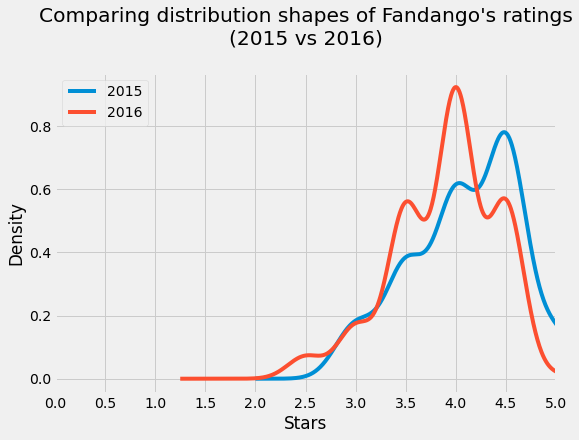

In [12]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)

plt.title("Comparing distribution shapes of Fandango's ratings\n(2015 vs 2016)",
          y = 1.07)
plt.xlabel('Stars')
plt.xlim(0,5)
plt.xticks(arange(0, 5.1, 0.5))
plt.show()

Two aspects are striking on the figure above:

- Both distributions are strongly skewed.
- The 2016 distribution is slightly shifted to the left relative to the 2015 distribution.

The left skew suggests that movies on Fandango are given mostly high and very high fan ratings. Coupled with the fact that Fandango sells tickets, the high ratings are bit dubious. It'd be really be interesting to investigate this further - ideally in a separate project, since this is quite irrelevant for the goal of our analysis.

The slight left shift of the 2016 distribution is very interesting for our analysis. It shows that ratings in 2016 was slightly lower comapred to 2015. This suggests there was indeed difference between Fandango's rating for poopular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the direction of difference: the ratings in 2016 were slightly lower compared to 2015.

## Comparing Relative Frequencies ##

It seems we're following a good thread so far, but we need to analyze more granular information. Let's examine the frequency table of two distributions to analyze some numbers. Beacause the data sets have different number of movies, we normalize the tables and show percentages instead.

In [13]:
print('2015' + '\n' + '-' * 16)     #To help distinguish between the two tables immediately and
                                    #avoid silly mistakes as we read ro and fro
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [14]:
print('2016' + '\n' + '-' * 16)

fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2016, very high ratings(4.5 and 5) had significantly lower percentagescompared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 star, compared to 2015 where the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 - there were approximatley 13% more movies rated with 4.5 in 2015 compared to 2016.

The minimum rating is also lower in 2016 -  2.5 instead of 3 stars, the minimum of 2015. Clearly there is difference between the two frequency distributions.

For some other ratings, percentages went up in 2016. There was a great percentage of movies in 2016 that received between 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings and this challenges the direction of the change we saw on the kernal density plots.

## Determing the Direction of the Change ##

Let's take a couple of summary metrics to get a more precise picture of the direction of change. In what follows, we'll compute the mean, the median and the mode for both distributions and then use a bar graph to plot the values.

In [15]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


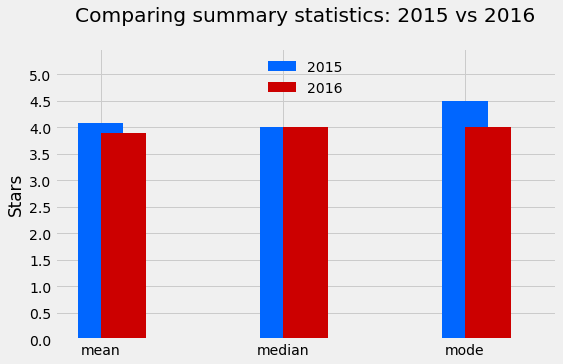

In [16]:
plt.style.use('fivethirtyeight')

summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = 0.25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = 0.25,
                         rot = 0 , figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0, 5.1, 0.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

The mean rating was lower in 2016 with approximatley 0.2. This means a drop of almost 5% relative to the mean rating in 2015.

In [17]:
(summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0]

0.04842683568951993

While is median is same for both distributions, the mode is lower in 2016 by 0.5. Coupled with what we saw for the mean, the direction of change we saw on the kernal density plot is confirmed: on average: popular movies released in 2016 were rated slighly lower than popular movies released in 2015.

## Conclusion ##

Our analysis showed that there's indeed a change a slight difference between Fandango's rating for popular movies in 2015 and Fandango's rating for popular movies in 2016. We also determined that, on average, popular movies released in 2016 was rated slightly lower than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system after Hicky's analysis.